In [1]:
from manim import *

# 2. Dynamic Scenes

This short (but important) chapter introduces ``ValueTracker`` and ``Updater`` that are a powerful tool when animating dynamic physical problems. The animation to recreate here looks fairly plain superficially, but it requires some "magic" to get the two (different) ``ValueTracker`` running simultaneously. The example animation for instance needed an [AnimationGroup](https://docs.manim.community/en/stable/reference/manim.animation.composition.AnimationGroup.html) and its functioning was not as straightforward as thought.

<video controls width="50%" src="external_media/Ch2_example_Scene.mp4" loop="true"></video>

Manim Community v0.19.0

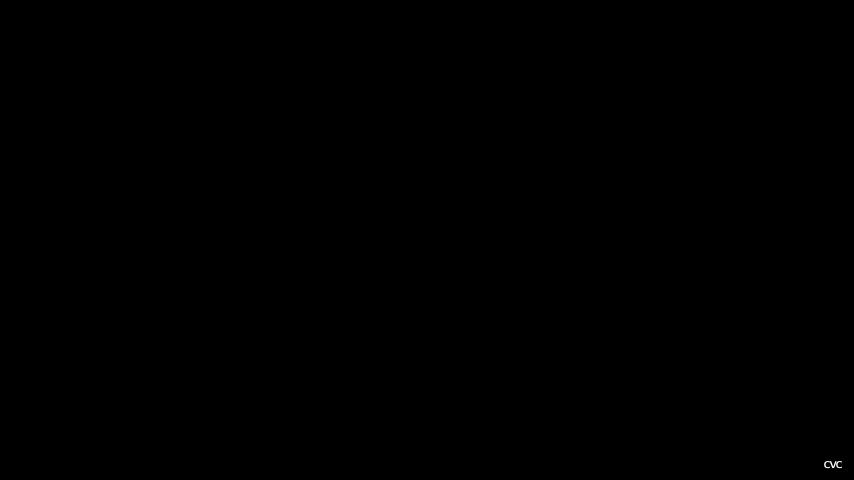

In [ ]:
%%manim -ql --fps 60 -v WARNING value_tracker_recreated_Scene


class value_tracker_recreated_Scene(Scene):
	def construct(self):
		# my initials: remove if you wish
		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

### Value Tracker and Updater

The keys to animating actual physics are ``ValueTracker`` and ``Updater``.

* ``ValueTracker`` provide an animation-wide real number that can be run from one value to another and subsequently be accessed globally in the scene. 
* ``Updater`` take a mobject and apply the defined operations for every animation frame. It is convenient to access the (global) value of a ``ValueTracker`` within the ``Updater`` and then for instance update the position of the mobject according to the desired behaviour under a tracker value.

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching tracker_Scene


def x_func(t):
	if t < 4:
		return t
	elif t < 6:
		return -2 * (t - 4) + 4
	elif t < 10:
		return 0
	else:
		return (t - 10)


class tracker_Scene(Scene):
	def construct(self):
		headline = Title("Value Tracker and Updater").align_on_border(UP)
		self.add(headline)

		# defining the system size and range
		x_length = 10
		y_length = 4
		x_range = [0, 20, 2]
		y_range = [0, 10, 2]

		# defining the coordinate system as a number plane
		npla = NumberPlane(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, 
			background_line_style = {"stroke_opacity": 0.5}, 
			axis_config = {"include_numbers": True,}
			).move_to([0, -0.5, 0])

		npla_xlabel = npla.get_x_axis_label(Tex(r"t", font_size = 36))
		npla_ylabel = npla.get_y_axis_label(Tex(r"x", font_size = 36))
		npla_group = VGroup(npla, npla_xlabel, npla_ylabel)
		self.add(npla_group)

		# placing a dot in the coordinate systems origin
		dot_position = npla.c2p(0, 0)
		dot = Dot(radius = 0.1, color = RED).move_to(dot_position)
		# using the dot as an object to add its position as an attribute
		dot.position = dot_position
		self.add(dot)

		# connect all points on the pathway of the dot
		dot_path_group = VGroup()


		# defining the updater: moves the dot the x(t) position for every animation frame
		def dot_updater(dot):
			t = t_tracker.get_value()
			x = x_func(t)
			# getting the old position from the dot and calculate the new one
			dot_position_old = dot.position
			dot_position_new = npla.c2p(t, x)
			# use old and new dot position to add a red line as a connector
			dot_path = Line(start = dot_position_old, end = dot_position_new, color = RED, stroke_width = 4)
			dot_path_group.add(dot_path)
			self.add(dot_path)
			# update the dots position attribute
			dot.position = dot_position_new
			dot.move_to(dot_position_new)


		# defining a value tracker with initial value 0
		t_tracker = ValueTracker(0)
		# adding the updater to the dot
		dot.add_updater(dot_updater)
		# playing the value tracker over 10 seconds: specifying the rate function to run linearly
		self.wait(0.5)
		self.play(t_tracker.animate.set_value(20), rate_func = linear, run_time = 10)
		self.wait(1.5)
		self.play(FadeOut(dot_path_group), FadeOut(dot), run_time = 3)
		self.wait(1.5)

Manim Community v0.19.0